<a href="https://colab.research.google.com/github/asyraffatha/Task-MachineLearning/blob/main/Week%20Perbaikan/Tugas_Perbaikan_Asyraff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION**

In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [4]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Fungsi yang digunakan untuk menampilkan key-key yang berguna untuk memahami struktur data dengan cepat

In [7]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive 
...


Fungsi menampilkan deskripsi dari dataset dengan panjang maksimal 193 karakter

In [8]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [10]:
#Fungsi untuk menampilkan nama-nama kategori target (spesies bunga) dalam dataset (Iris).
print("Target names: {}".format(iris_dataset['target_names']))
#Fungsi untuk menampilkan nama-nama fitur (atribut) dalam dataset (Iris).
print("Feature names: \n{}".format(iris_dataset['feature_names']))
#Fungsi untuk menampilkan tipe data dari key 'data'
print("Type of data: {}".format(type(iris_dataset['data'])))
#Fungsi untuk menampilkan jumlah kolom
print("Shape of data: {}".format(iris_dataset['data'].shape))

Target names: ['setosa' 'versicolor' 'virginica']
Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Type of data: <class 'numpy.ndarray'>
Shape of data: (150, 4)


In [16]:
#Fungsi untuk menampilkan 5 baris pertama dari fitur "data"
print("First five columns of data:\n{}".format(iris_dataset['data'][:5]))
#Fungsi untuk menampilkan tipe data dari key "Target"
print("Type of target: {}".format(type(iris_dataset['target'])))
#Fungsi untuk menampilkan jumlah elemen dari array/target "Target"
print("Shape of target: {}".format(iris_dataset['target'].shape))
#Fungsi untuk menampilkan isi dari label "Target" yang dimana 0: setosa, 1: versicolor. 2: virginica
print("Target:\n{}".format(iris_dataset['target']))


First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Type of target: <class 'numpy.ndarray'>
Shape of target: (150,)
Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**Traning and Testing Data**

Penting untuk membagi data menjadi training set dan test set untuk menghindari masalah overfitting. Test set memberikan gambaran akurat tentang performa model pada data baru.
Menggunakan fungsi *train_test_split* mempermudah pembagian data secara acak dan memastikan distribusi data yang seimbang.


In [20]:
#Training set: Digunakan untuk melatih model machine learning.
#Digunakan untuk mengevaluasi kinerja model pada data yang belum pernah dilihat sebelumnya.
#Secara default, fungsi ini membagi data menjadi 75% training set dan 25% test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0)

#X_train: Berisi data fitur (input) untuk training set.
#y_train: Berisi label target (output) yang sesuai dengan setiap sampel di X_train.
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
#Ada 112 sampel dalam training set. Setiap sampel memiliki 4 fitur (panjang/lebar sepal dan petal)
#Ada 112 label target, satu untuk setiap sampel di X_train.

#X_test: Berisi data fitur (input) untuk test set. Dalam konteks dataset Iris, X_test memiliki beberapa baris (jumlah sampel) dan 4 kolom (fitur: panjang sepal, lebar sepal, panjang petal, lebar petal).
#y_test: Berisi label target (output) yang sesuai dengan setiap sampel di X_test. Dalam konteks dataset Iris, y_test berupa array 1D dengan panjang yang sama dengan jumlah baris di X_test.
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))
#Ada 38 sampel dalam test set. (Setiap sampel memiliki 4 fitur (panjang/lebar sepal dan petal)).
#Ada 38 label target, satu untuk setiap sampel di X_test.

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


**Pentingnya Visualisasi Data**



*   Penting untuk memahami struktur data, mendeteksi keanehan, dan mengidentifikasi pola awal sebelum membangun model.
*   Scatter plot untuk setiap pasangan fitur membantu memahami hubungan antar fitur.
*  Pair plot sangat berguna untuk dataset dengan jumlah fitur kecil (seperti dataset Iris).
*   Pair plot tidak dapat menunjukkan hubungan kompleks yang melibatkan lebih dari dua fitur secara bersamaan.


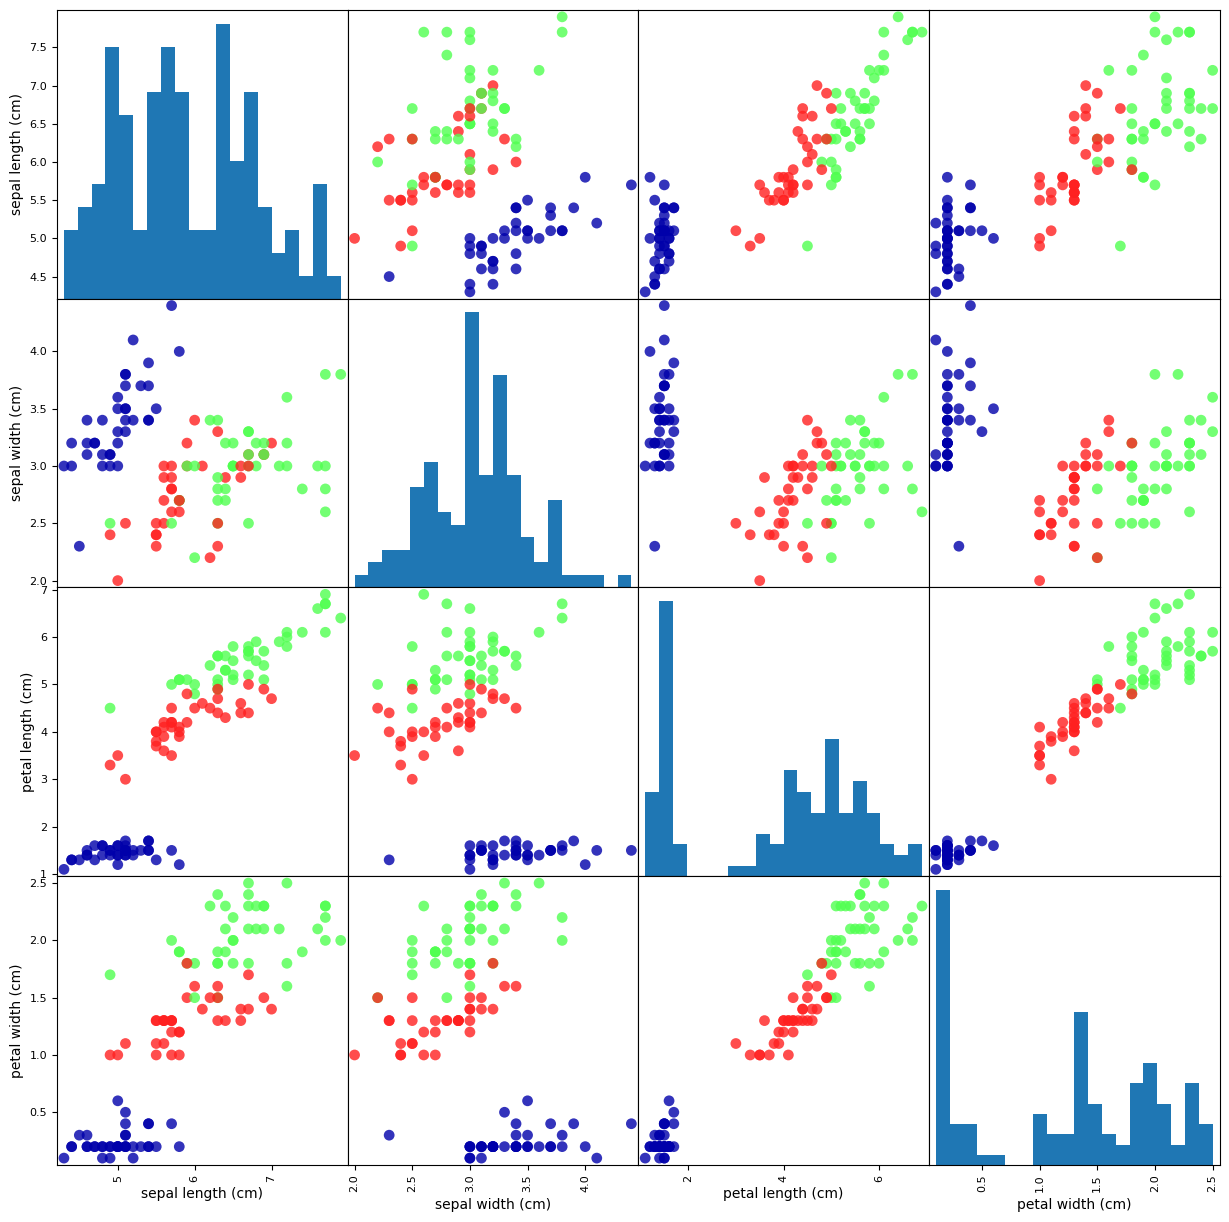

In [27]:
!pip install mglearn

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import mglearn
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# Create a scatter matrix from the DataFrame, color points by y_train
grr = scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                     hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

plt.show()


**Model Pertama : k-Nearest Neighbors**

In [31]:
# Langkah awal sebelum melatih model dengan data dan melakukan prediksi atau evaluasi.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

# Melatih model k-Nearest Neighbors (k-NN)
knn.fit(X_train, y_train)
#digunakan untuk melatih model k-NN dengan data training. Proses ini tidak melakukan pelatihan berbasis parameter, tetapi hanya menyimpan data untuk digunakan dalam prediksi.

#Membuat array NumPy (X_new) yang merepresentasikan data baru dengan nilai fitur tertentu untuk prediksi.
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))
# Digunakan untuk membuat prediksi dari data baru menggunakan model k-NN yang telah dilatih. Prediksi dikonversi dari nilai numerik ke nama kelas untuk memudahkan interpretasi.
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
iris_dataset['target_names'][prediction]))

X_new.shape: (1, 4)
Prediction: [0]
Predicted target name: ['setosa']


In [34]:
#Fungsi untuk melakukan prediksi pada test set (X_test) menggunakan model k-Nearest Neighbors (k-NN) yang telah dilatih.
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))
#Fungsi untuk menghitung dan menampilkan akurasi model pada test set.
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))



Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Test set score: 0.97


# **SUPERVISED LEARNING**

X.shape: (26, 2)


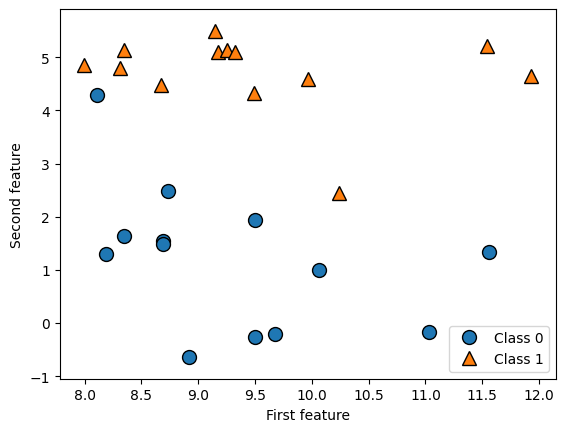

In [35]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
#Kode ini menghasilkan dataset sintetis untuk eksplorasi dan pengujian awal algoritma klasifikasi. Scatter plot memberikan gambaran visual tentang hubungan antara fitur dan distribusi kelas, sementara X.shape memastikan dimensi dataset sesuai harapan

Text(0, 0.5, 'Target')

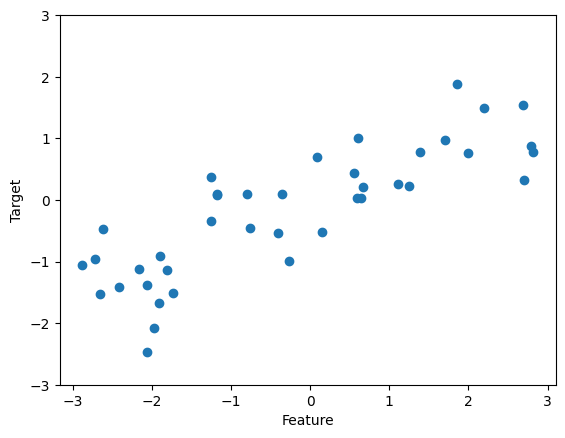

In [36]:
# Digunakan untuk menghasilkan dan memvisualisasikan dataset sederhana untuk tugas regresi.
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")
#

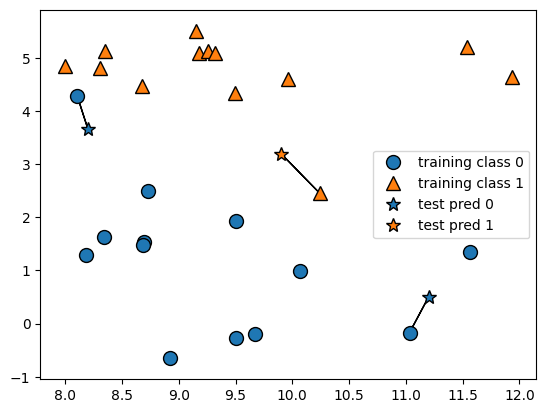

In [40]:
#Fungsi untuk memvisualisasikan cara kerja algoritma k-Nearest Neighbors (k-NN) pada data dua dimensi.
#Menentukan bahwa model k-NN hanya menggunakan 1 tetangga terdekat untuk memprediksi kelas.
mglearn.plots.plot_knn_classification(n_neighbors=1)

In [44]:
# Membagi dataset menjadi training set dan test set menggunakan train_test_split().
# Melatih model k-NN menggunakan dataset pelatihan (X_train dan y_train).
# Membuat prediksi pada test set (X_test) dan menghitung akurasi model pada test set.
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, y_train)
print("Test set predictions: {}".format(clf.predict(X_test)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


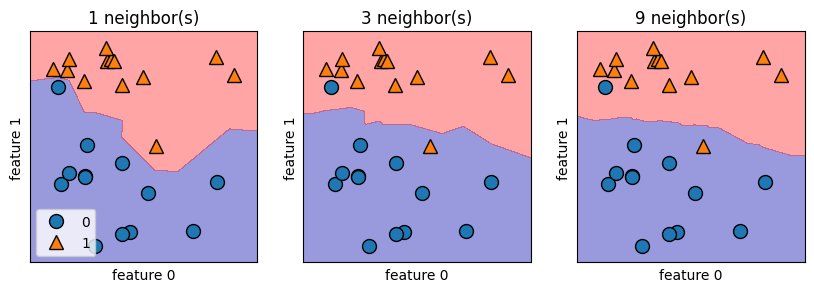

In [46]:
#Fungsi untuk menggambar batas keputusan yang dipelajari oleh model klasifikasi (seperti k-NN) dalam ruang dua dimensi (2D).
#Batas keputusan ini memisahkan ruang fitur ke dalam daerah-daerah yang berbeda sesuai dengan kelas target yang diprediksi oleh model.
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# Loop over n_neighbors values and axes
for n_neighbors, ax in zip([1, 3, 9], axes):
    # Instantiate and fit the KNeighborsClassifier
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)

    # Plot the decision boundary
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)

    # Plot the data points
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)

    # Set the title and labels
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

# Add legend to the first subplot
axes[0].legend(loc=3)

# Show the plot
plt.show()

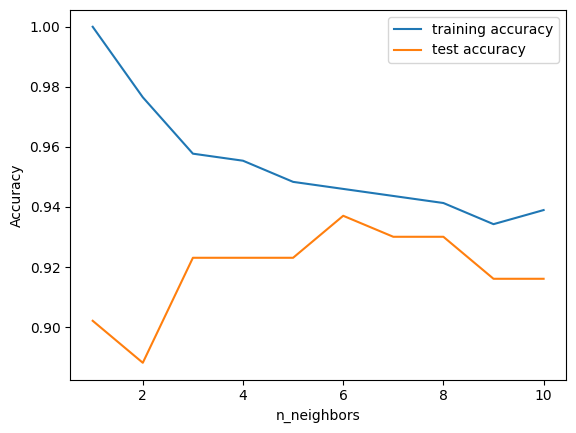

In [48]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) # Indented this line
    clf.fit(X_train, y_train) # Indented this line
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train)) # Indented this line
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test)) # Indented this line
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Grafik menunjukkan bahwa akurasi test set akan meningkat saat jumlah neighbors bertambah dari 1, tetapi jika terlalu banyak (misalnya 10), akurasi test set mulai menurun karena model menjadi terlalu sederhana.
Akurasi tertinggi biasanya tercapai dengan jumlah neighbors yang sedang (misalnya sekitar 6).
Skala plot juga perlu diperhatikan, karena bahkan akurasi terendah (misalnya 88%) masih dapat dianggap cukup baik untuk banyak aplikasi, meskipun ada ruang untuk perbaikan.

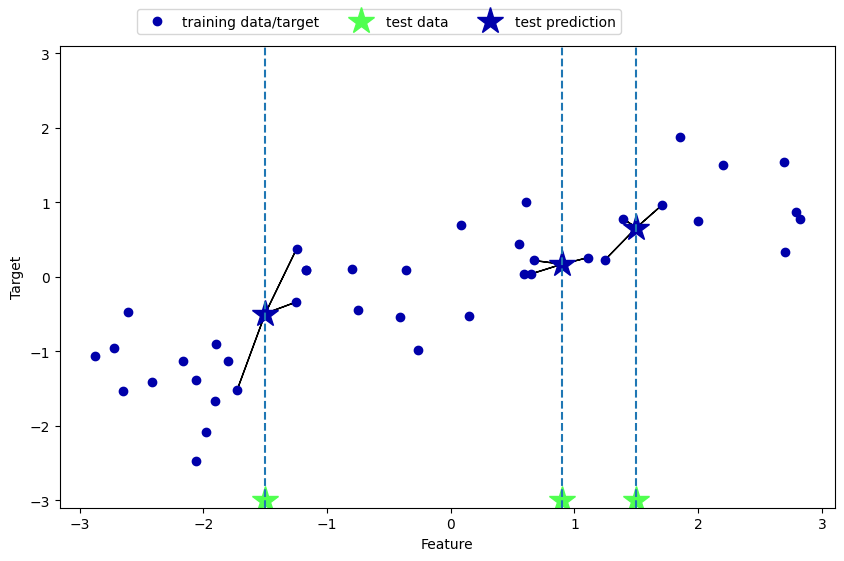

In [50]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [51]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [53]:
#Membuat prediksi pada test set (X_test) menggunakan model yang telah dilatih.
print("Test set predictions:\n{}".format(reg.predict(X_test)))
#Menghitung skor R² (koefisien determinasi) untuk mengevaluasi akurasi model pada test set, yang menunjukkan seberapa baik model dapat menjelaskan variasi dalam data target (y_test).
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


***Linear Models***

For regression, the general prediction formula for a linear model:
# ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

Formula Regression Linear:
# ŷ = w[0] * x[0] + b

w[0]: 0.393906  b: -0.031804


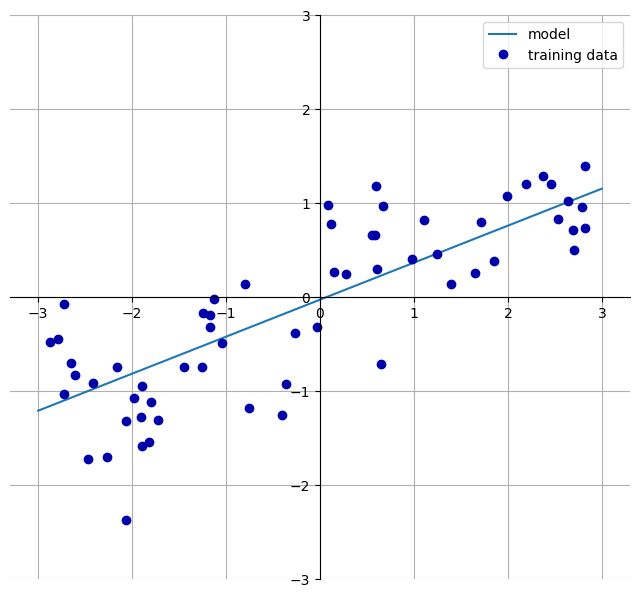

In [54]:
mglearn.plots.plot_linear_regression_wave()

model regresi linier adalah model yang sangat sederhana yang memodelkan hubungan antara fitur dan target sebagai fungsi linear. Ini bisa sangat efektif dalam situasi dengan banyak fitur, tetapi bisa terlalu sederhana (dan tidak efektif) untuk data dengan hubungan yang lebih kompleks. Dalam kasus yang lebih kompleks, model berbasis neighbor terdekat atau model non-linear lainnya mungkin lebih tepat digunakan.

**Linear models for multiclass classification**

# w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

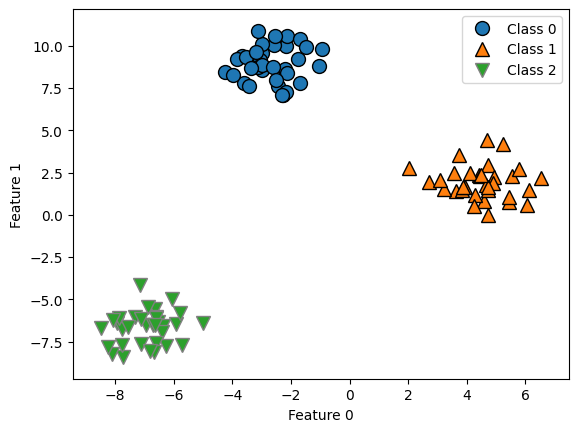

In [57]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

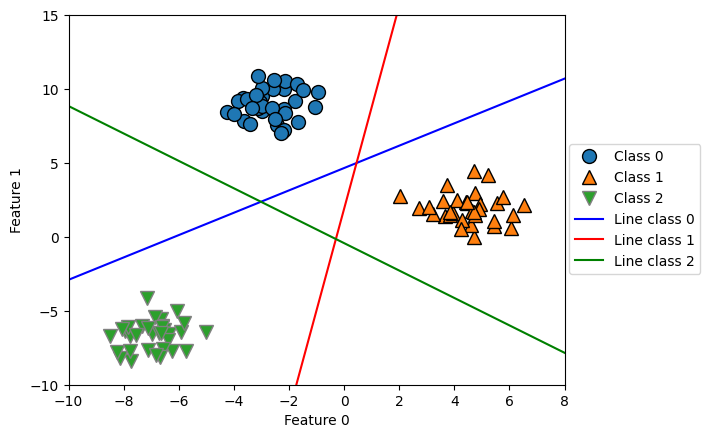

In [63]:
from sklearn.svm import LinearSVC

# Before the for loop:
linear_svm = LinearSVC().fit(X, y) # Create and train a LinearSVC model

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

Grafik menunjukkan bahwa akurasi test set akan meningkat saat jumlah tetangga bertambah dari 1, tetapi jika terlalu banyak (misalnya 10), akurasi test set mulai menurun karena model menjadi terlalu sederhana.

**NEURAL NETWORK**
# ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

Text(0, 0.5, 'relu(x), tanh(x)')

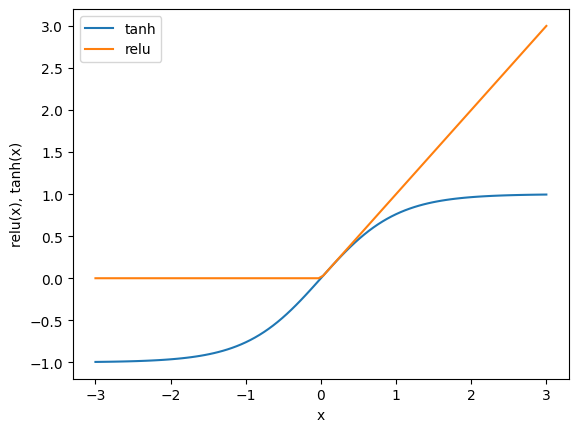

In [65]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

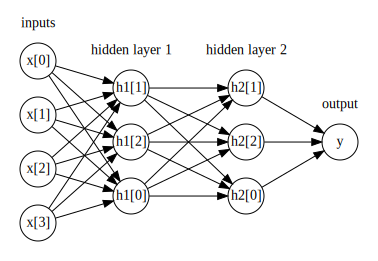

In [66]:
mglearn.plots.plot_two_hidden_layer_graph()

**Uncertainty Estimates from Classifiers**



*   decision_function dan predict_proba memberikan cara untuk mendapatkan perkiraan ketidakpastian dalam prediksi yang dibuat oleh model.
*   Memahami dan menggunakan ketidakpastian dalam prediksi sangat penting untuk aplikasi-aplikasi dunia nyata yang berisiko tinggi, seperti dalam diagnosis medis atau sistem pengambilan keputusan yang sensitif.



In [73]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
# we rename the classes "blue" and "red" for illustration purposes
y_named = np.array(["blue", "red"])[y]
# we can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
train_test_split(X, y_named, y, random_state=0)
# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

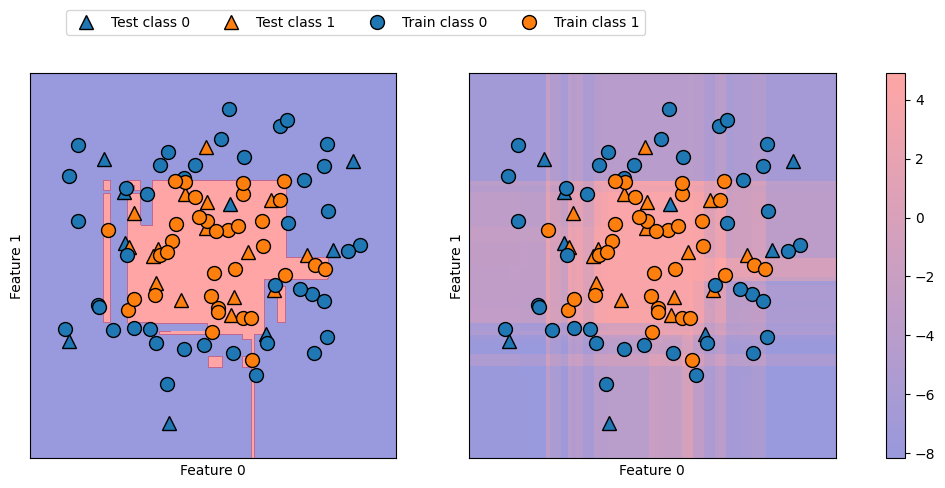

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                          alpha=.4, cm=mglearn.ReBl)
for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                            markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                            markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))


*   Nearest neighbors
Untuk dataset kecil, baik digunakan sebagai acuan dasar, mudah untuk dijelaskan.

*   Linear models
Pilihan pertama yang baik untuk mencoba algoritma, cocok untuk dataset yang sangat besar, baik untuk data dengan dimensi yang sangat tinggi.

*   Naive Bayes
Hanya untuk klasifikasi. Lebih cepat daripada model linier, cocok untuk dataset yang sangat besar dan data berdimensi tinggi. Sering kali kurang akurat dibandingkan dengan model linier.
*   Decision Tree
Sangat cepat, tidak membutuhkan penskalaan data, dapat divisualisasikan dan mudah dijelaskan.


*   Random Forest
Hampir selalu memberikan kinerja yang lebih baik daripada pohon keputusan tunggal, sangat robust dan kuat. Tidak memerlukan penskalaan data. Tidak cocok untuk data dengan dimensi sangat tinggi dan jarang (sparse).


*   Gradient boosted decision trees
Sering kali sedikit lebih akurat daripada random forests. Lebih lambat dalam pelatihan, tetapi lebih cepat dalam prediksi dan lebih efisien dalam penggunaan memori dibandingkan dengan random forests. Membutuhkan lebih banyak penyetelan parameter daripada random forests.

*   Neural Network
Dapat membangun model yang sangat kompleks, terutama untuk dataset besar. Sensitif terhadap penskalaan data dan pemilihan parameter. Model besar membutuhkan waktu pelatihan yang lama.



# **Unsupervised Learning and Preprocessing**

In [76]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]




*   MinMaxScaler digunakan untuk menskala data sehingga setiap fitur berada dalam rentang tertentu (biasanya [0, 1]).
*   Proses ini penting untuk memastikan bahwa model machine learning tidak terpengaruh oleh skala fitur yang sangat berbeda, sehingga meningkatkan performa dan stabilitas model.

<ipython-input-82-8d54f77788d6>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(X_train[:, 0], X_train[:, 1],
<ipython-input-82-8d54f77788d6>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
<ipython-input-82-8d54f77788d6>:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have 

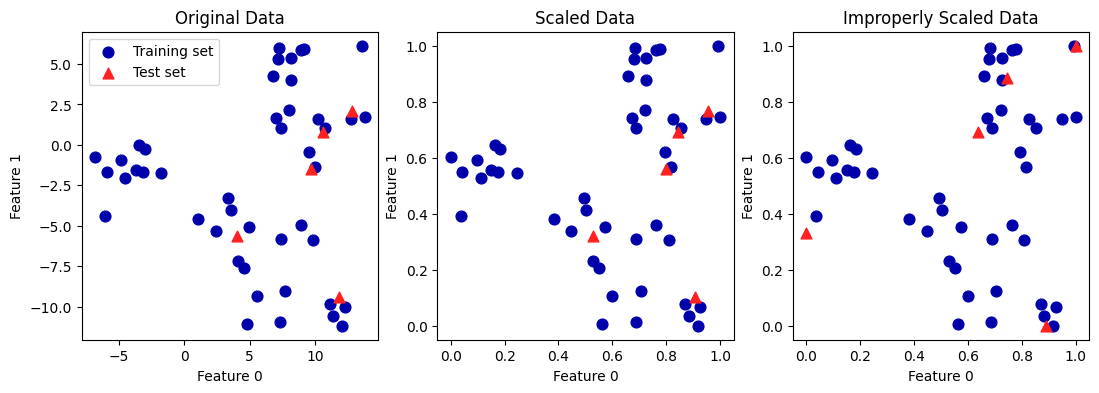

In [82]:
from sklearn.datasets import make_blobs
# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)
# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

axes[0].scatter(X_train[:, 0], X_train[:, 1],
c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")
# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")
# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)
# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")
for ax in axes:
    # Indent the lines within the for loop
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")



*   Gambar 1: himpunan data dua dimensi yang tidak diskalakan. Sedangkan Panel ketiga menunjukkan apa yang akan terjadi jika kita menskalakan set pelatihan dan set pengujian
Secara terpisah. Dalam hal ini, nilai fitur minimum dan maksimum untuk kedua kereta
ing dan set uji adalah 0 dan 1.


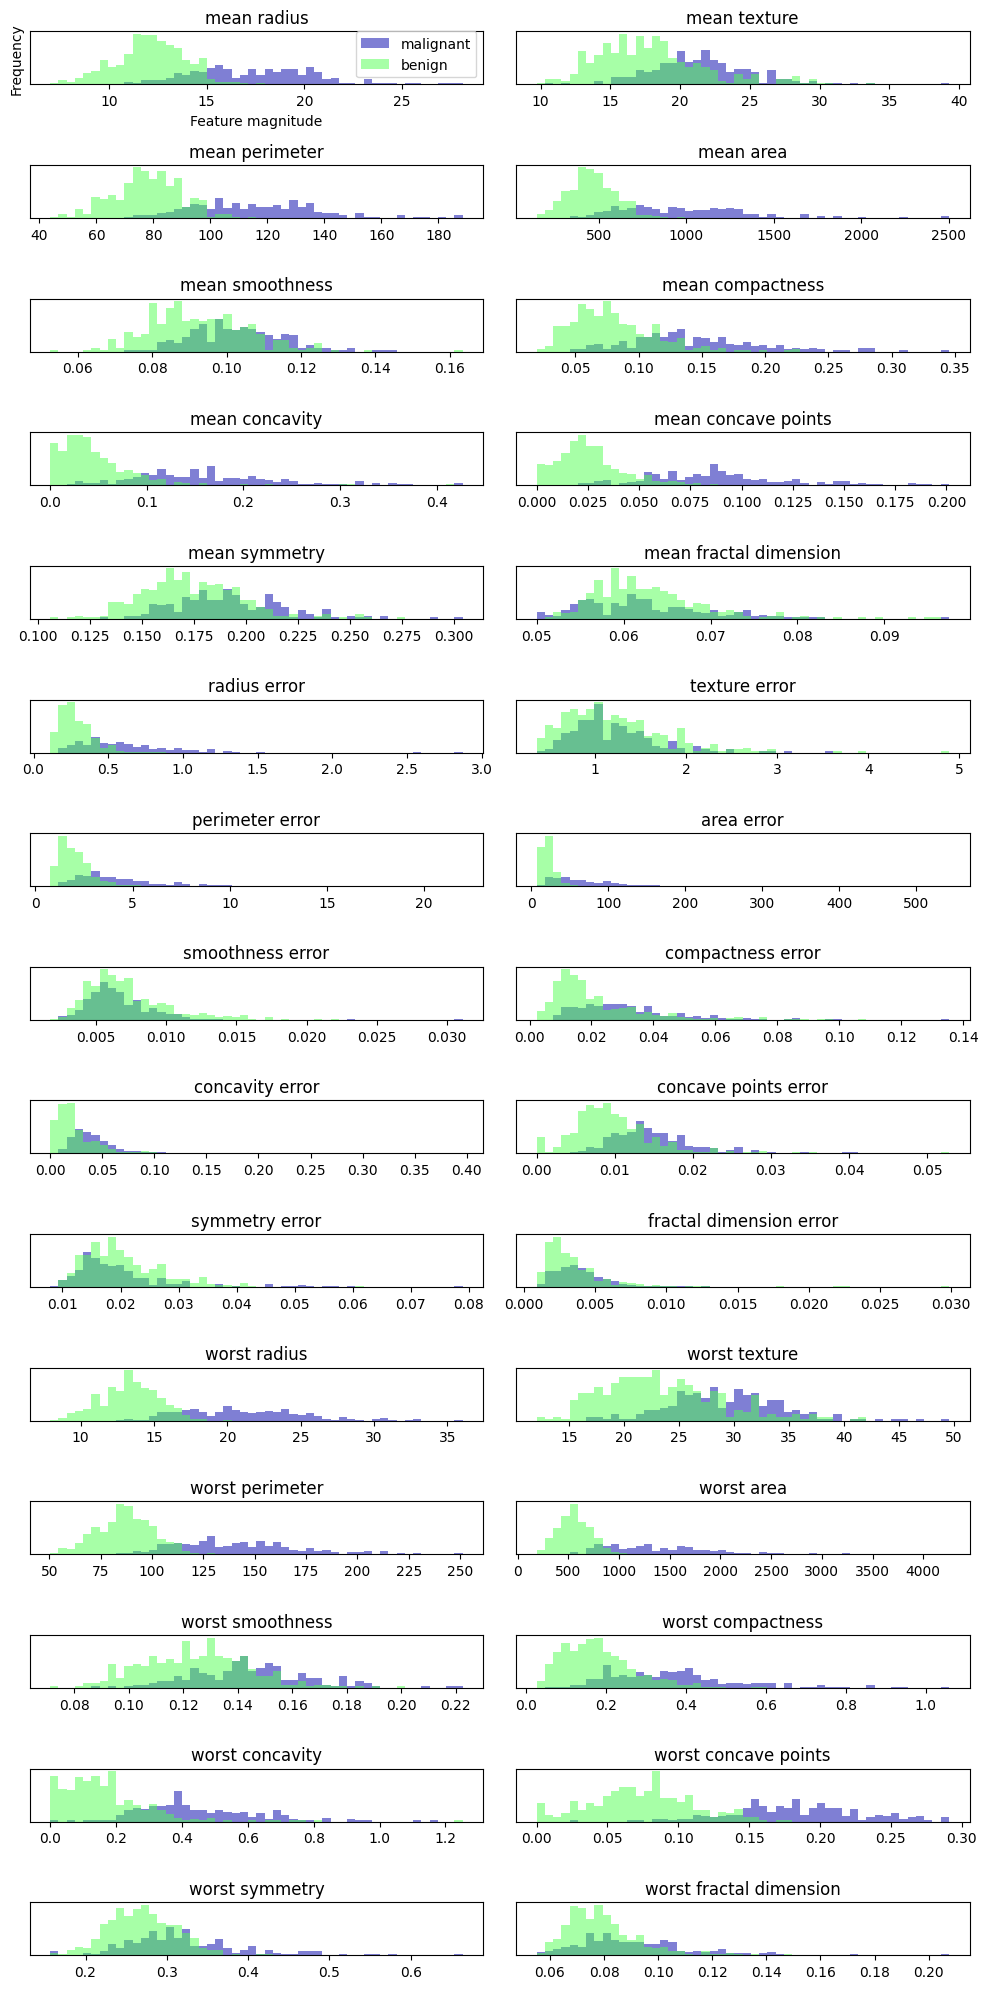

In [84]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    # Indent the lines within the for loop
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    ax[0].set_xlabel("Feature magnitude")
    ax[0].set_ylabel("Frequency")
    ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

Diatas adalah Histogram untuk masing-masing fitur, menghitung seberapa sering titik data
muncul dengan fitur dalam rentang tertentu (disebut bin).Ini memberi kita gambaran tentang bagaimana setiap fitur didistribusikan
di dua kelas, dan memungkinkan kami untuk menebak fitur mana yang lebih baik
untuk membedakan sampel.

# **DBSCAN**

In [85]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

# Menerapkan algoritma DBSCAN pada dataset untuk membagi data menjadi beberapa klaster berdasarkan kepadatan titik-titik data.
# Mendapatkan label cluster untuk setiap titik, sehingga kita bisa tahu titik mana yang berada dalam klaster yang sama atau yang merupakan outlier.

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


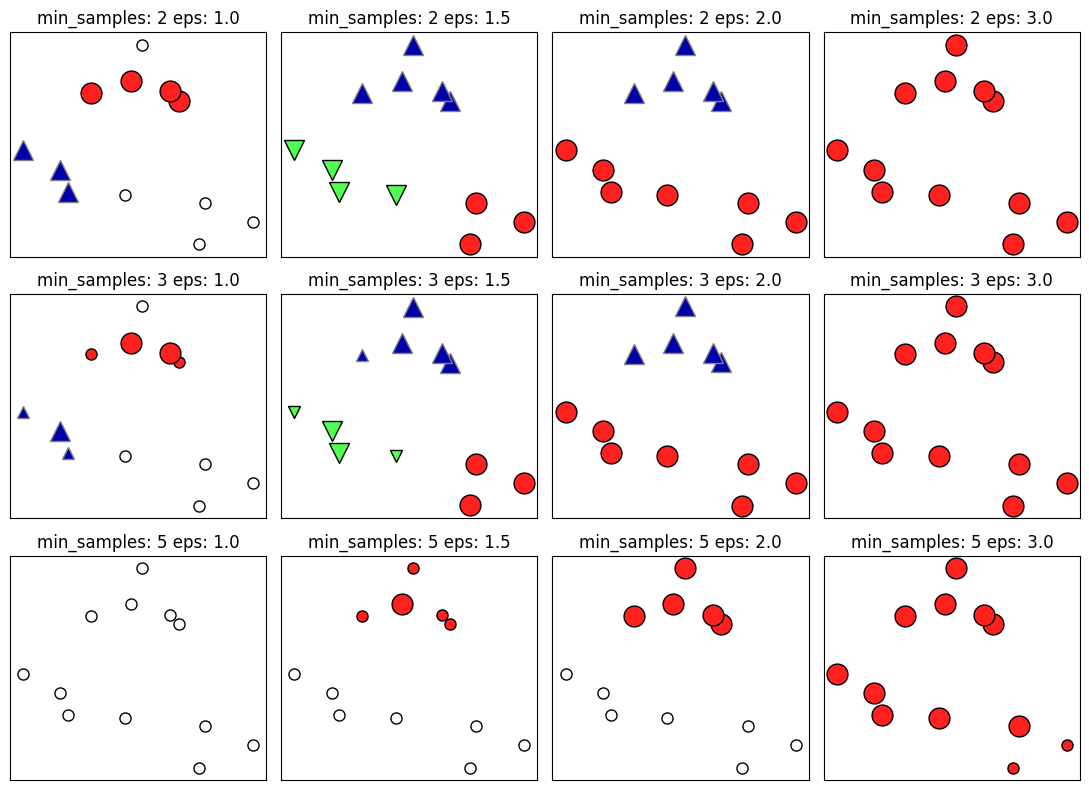

In [86]:
mglearn.plots.plot_dbscan()

Keunggulan nya:


1.   Tidak Memerlukan Jumlah Klaster yang Ditetapkan (Non-parametric)
2.   Mampu Menangani Klaster dengan Bentuk yang Tidak Teratur
3. Dapat Menemukan Outlier (Noise)
4. Efisiensi untuk Dataset Besar

Kekurangan:
1. Sangat Sensitif terhadap Parameter
2. Kesulitan dengan Klaster dengan Kepadatan Berbeda
3. Tidak Cocok untuk Data dengan Ukuran Berbeda





# **Representing Data and Engineering Features**

# ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0

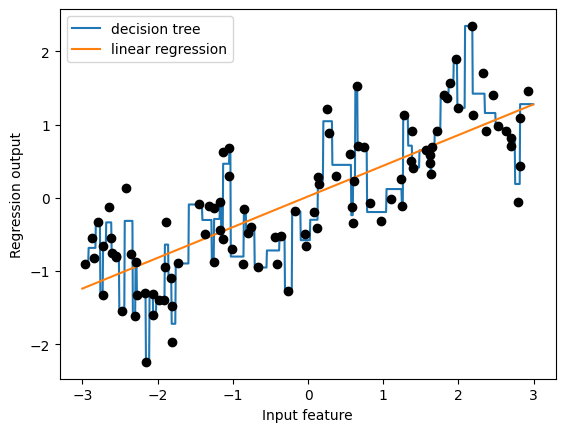

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

**Cross-Validation in scikit-learn**

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [95]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Average cross-validation score: 0.97


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Simple Grid Search**

In [98]:
# naive grid search implementation
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split # Added this import

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
print("Size of training set: {} size of test set: {}".format(
    X_train.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112 size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


In [100]:
from sklearn.svm import SVC
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
iris.data, iris.target, random_state=0)
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
X_trainval, y_trainval, random_state=1)
print("Size of training set: {} size of validation set: {} size of test set:"
" {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]: # Indented this line
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84 size of validation set: 28 size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92
